## 2.3. Feature Selection

### 2.3.1. Feature Selection Algorithms

In [1]:
import pandas as pd
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sbn
import math

In [2]:
#train and test check
train_data=pd.read_csv('final_train_data_StdSc.csv')
test_data=pd.read_csv('final_test_data_StdSc.csv')

In [3]:
print(train_data.shape)
print(test_data.shape)

(70598, 157)
(262843, 157)


In [11]:
print(train_data['is_churn'].sum()) #should be 70598/2
print(test_data['is_churn'].sum()) #should be %6-%7 of 262.843 

35299
17293


In [12]:
print(train_data.columns)

Index(['Unnamed: 0', 'bd', 'num_25_sum', 'num_50_sum', 'num_75_sum',
       'num_985_sum', 'num_100_sum', 'num_unq_sum', 'num_totalsec_sum',
       'num_25_mean',
       ...
       'gender_0', 'gender_1', 'gender_2', 'registered_via_3',
       'registered_via_4', 'registered_via_7', 'registered_via_9',
       'registered_via_13', 'is_churn', 'msno'],
      dtype='object', length=157)


In [13]:
df_final_last=train_data.drop(['msno','is_churn','Unnamed: 0'],axis=1)#this dataset shouldn't include msno and in_churn
print(df_final_last.columns)

Index(['bd', 'num_25_sum', 'num_50_sum', 'num_75_sum', 'num_985_sum',
       'num_100_sum', 'num_unq_sum', 'num_totalsec_sum', 'num_25_mean',
       'num_50_mean',
       ...
       'city_21', 'city_22', 'gender_0', 'gender_1', 'gender_2',
       'registered_via_3', 'registered_via_4', 'registered_via_7',
       'registered_via_9', 'registered_via_13'],
      dtype='object', length=154)


In [14]:
X = df_final_last
y = train_data['is_churn']

In [18]:
print(X.shape)
print(X.head())

(70598, 154)
         bd  num_25_sum  num_50_sum  num_75_sum  num_985_sum  num_100_sum  \
0  1.005242    1.447979    1.855278    2.181346     1.498299     4.279500   
1  1.067876    1.812864    0.403297    0.338342     0.218478     1.165877   
2 -0.811134    0.691709    2.526819    1.119776     0.976891     0.145719   
3  1.130510   -0.669986   -0.476966   -0.413604    -0.563636    -0.450727   
4 -0.811134    1.466325    1.773604    0.367830     0.254028    -0.497478   

   num_unq_sum  num_totalsec_sum  num_25_mean  num_50_mean        ...          \
0     4.180203          4.400011     0.677988     0.887971        ...           
1     1.489773          1.256013     1.233600    -0.025824        ...           
2     0.624301          0.297107     0.118161     1.404949        ...           
3    -0.443168         -0.440912    -0.749262    -0.341240        ...           
4     0.216546         -0.404540     1.081068     1.258413        ...           

    city_21   city_22  gender_0  gend

In [19]:
print(y.shape)
print(y.head())

(70598,)
0    0
1    0
2    0
3    0
4    0
Name: is_churn, dtype: int64


#### PCA

In [20]:
#PCA
#http://benalexkeen.com/principle-component-analysis-in-python/

def get_important_features(transformed_features, components_, columns):
    """
    This function will return the most "important" 
    features so we can determine which have the most
    effect on multi-dimensional scaling
    """
    num_columns = len(columns)

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print ("Features by importance:\n", important_features)


In [21]:
X.values

array([[ 1.00524231,  1.44797908,  1.85527759, ..., -1.15750983,
         1.69155172, -0.05888029],
       [ 1.06787596,  1.8128643 ,  0.40329691, ..., -1.15750983,
         1.69155172, -0.05888029],
       [-0.81113354,  0.69170858,  2.52681866, ...,  0.86392355,
        -0.59117318, -0.05888029],
       ..., 
       [-0.81113354, -0.82898628, -0.92163546, ...,  0.86392355,
        -0.59117318, -0.05888029],
       [ 1.19314326, -0.19094675,  0.0584515 , ..., -1.15750983,
         1.69155172, -0.05888029],
       [ 0.50417311, -0.205216  , -0.18657024, ..., -1.15750983,
        -0.59117318, -0.05888029]])

In [22]:
pca = PCA()
S=pca.fit_transform(X)
get_important_features(S, pca.components_, X.columns.values)

Features by importance:
 [(8.804881164801499, 'num_100_mean'), (8.736908146125645, 'num_100_lastthree_mean'), (8.480494387538767, 'num_totalsec_mean'), (8.418621345605176, 'num_totalsec_lastthree_mean'), (8.385322993351236, 'num_100_med'), (8.313011202312701, 'num_100_lasttwo_mean'), (8.051727214267922, 'num_totalsec_med'), (8.047034433924766, 'num_totalsec_lasttwo_mean'), (7.976941981924162, 'num_75_lastthree_mean'), (7.957569908535587, 'num_50_lastthree_mean'), (7.949989337959667, 'num_100_lastthree_sum'), (7.943454478404857, 'num_100_sum'), (7.814448700334118, 'num_totalsec_lastthree_sum'), (7.8045707207911095, 'num_75_mean'), (7.793502034445018, 'num_totalsec_sum'), (7.789409759672682, 'num_above_50_sum'), (7.770854480139118, 'num_100_201701_mean'), (7.75503460292853, 'num_100_201612_mean'), (7.660287130536856, 'num_50_mean'), (7.5915712538337745, 'num_75_lasttwo_mean'), (7.5851585231485705, 'num_50_lastthree_sum'), (7.568162796913145, 'num_50_lasttwo_mean'), (7.528626096355729, 'n

#### RFE

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [29]:
# feature extraction
model = LogisticRegression()
rfe = RFE(model, 20)
fit = rfe.fit(X, y)

In [1]:
print(rfe)
print(X.columns.tolist())
print(rfe.support_)
print(rfe.ranking_)

NameError: name 'rfe' is not defined

####  Mutual Information

In [24]:
#MUTUAL INFORMATION
X_new = SelectKBest(mutual_info_classif, k=20).fit(X, y)
feature_names = list(X.columns.values)
mask = X_new.get_support() #list of booleans
new_features_mi = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features_mi.append(feature)

In [25]:
new_features_mi

['num_50_201702_sum',
 'num_75_201702_sum',
 'num_100_201702_sum',
 'num_unq_201702_sum',
 'num_totalsec_201702_sum',
 'num_25_201702_mean',
 'num_50_201702_mean',
 'num_75_201702_mean',
 'num_100_201702_mean',
 'num_unq_201702_mean',
 'number_of_days_201702_listened',
 'number_of_days_lasttwo_listened',
 'most_fq_payment_method_id',
 'total_churn',
 'is_auto_renew',
 'total_cancel',
 'active_days',
 'avg_plan_list_price',
 'avg_actual_amount_paid',
 'registered_via_7']

#### F Classification

In [26]:
#F_CLASSIF
X_new = SelectKBest(f_classif, k=20).fit(X, y)
mask = X_new.get_support() #list of booleans
new_features_f = [] # The list of your K best features

for bool, feature in zip(mask, feature_names):
    if bool:
        new_features_f.append(feature)

In [27]:
new_features_f

['num_25_201702_sum',
 'num_50_201702_sum',
 'num_75_201702_sum',
 'num_985_201702_sum',
 'num_100_201702_sum',
 'num_unq_201702_sum',
 'num_totalsec_201702_sum',
 'number_of_days_201702_listened',
 'number_of_days_lasttwo_listened',
 'number_of_days_lastthree_listened',
 'total_churn',
 'is_auto_renew',
 'total_cancel',
 'active_days',
 'avg_plan_list_price',
 'avg_actual_amount_paid',
 'gender_2',
 'registered_via_3',
 'registered_via_4',
 'registered_via_7']

#### Random Forest

In [32]:
#Mean decrease impurity
from sklearn.ensemble import RandomForestRegressor
import numpy as np
A = np.squeeze(np.asarray(X))#change dataset to array

X1 = A# The data shouldn't includ feature name, and the columns of msno and is_churn
Y1 = y
names =list(X.columns.values)
#name should be the feature_name
rf = RandomForestRegressor()
rf.fit(X1, Y1)
print ("Features with their score:")
c=zip(list(map(lambda x: round(x, 4), rf.feature_importances_)),names)
list(c)

Features with their score:


[(0.0033999999999999998, 'bd'),
 (0.0015, 'num_25_sum'),
 (0.0019, 'num_50_sum'),
 (0.0015, 'num_75_sum'),
 (0.0016999999999999999, 'num_985_sum'),
 (0.0011999999999999999, 'num_100_sum'),
 (0.0018, 'num_unq_sum'),
 (0.0011999999999999999, 'num_totalsec_sum'),
 (0.0019, 'num_25_mean'),
 (0.0019, 'num_50_mean'),
 (0.0023999999999999998, 'num_75_mean'),
 (0.0020999999999999999, 'num_985_mean'),
 (0.0011999999999999999, 'num_100_mean'),
 (0.0020999999999999999, 'num_unq_mean'),
 (0.0012999999999999999, 'num_totalsec_mean'),
 (0.0011000000000000001, 'num_25_med'),
 (0.00029999999999999997, 'num_50_med'),
 (0.00020000000000000001, 'num_75_med'),
 (0.00029999999999999997, 'num_985_med'),
 (0.0011000000000000001, 'num_100_med'),
 (0.0019, 'num_unq_med'),
 (0.0020999999999999999, 'num_totalsec_med'),
 (0.0027000000000000001, 'num_25_max'),
 (0.0016999999999999999, 'num_50_max'),
 (0.0018, 'num_75_max'),
 (0.0016000000000000001, 'num_985_max'),
 (0.0022000000000000001, 'num_100_max'),
 (0.00259

### 2.3.2.Correlations

In [33]:
#looking at correlations for the top 20 variables chosen by each
for_cor=df_final_last[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_plan_list_price','avg_actual_amount_paid','num_unq_201702_sum','num_totalsec_201702_sum','number_of_days_lasttwo_listened','most_fq_payment_method_id','num_75_mean','number_of_days_listened','num_25_201702_sum','num_50_201702_sum','num_75_201702_sum','num_100_201702_sum','num_25_201702_mean','num_50_201702_mean','num_100_lasttwo_mean','num_totalsec_lasttwo_mean','number_of_days_lastthree_listened','total_churn','registered_via_3','registered_via_4','registered_via_7','bd','num_100_sum','num_totalsec_sum','num_50_mean','num_100_mean','num_totalsec_mean','num_100_med','num_totalsec_med','num_25_max','num_unq_max','num_totalsec_max','num_totalsec_min','num_985_201702_sum','num_75_201702_mean','num_100_201702_mean','num_unq_201702_mean','num_totalsec_201702_mean','num_unq_201701_sum','num_100_201701_mean','number_of_days_201701_listened','num_25_201612_mean','num_100_201612_mean','num_unq_lasttwo_sum','num_75_lasttwo_mean','num_100_lastthree_sum','num_totalsec_lastthree_sum','num_50_lastthree_mean','num_75_lastthree_mean','num_100_lastthree_mean','num_totalsec_lastthree_mean','num_above_50_sum','proportion_songs_above_50','gender_2','registered_via_9']]

In [34]:
for_cor.shape

(70598, 59)

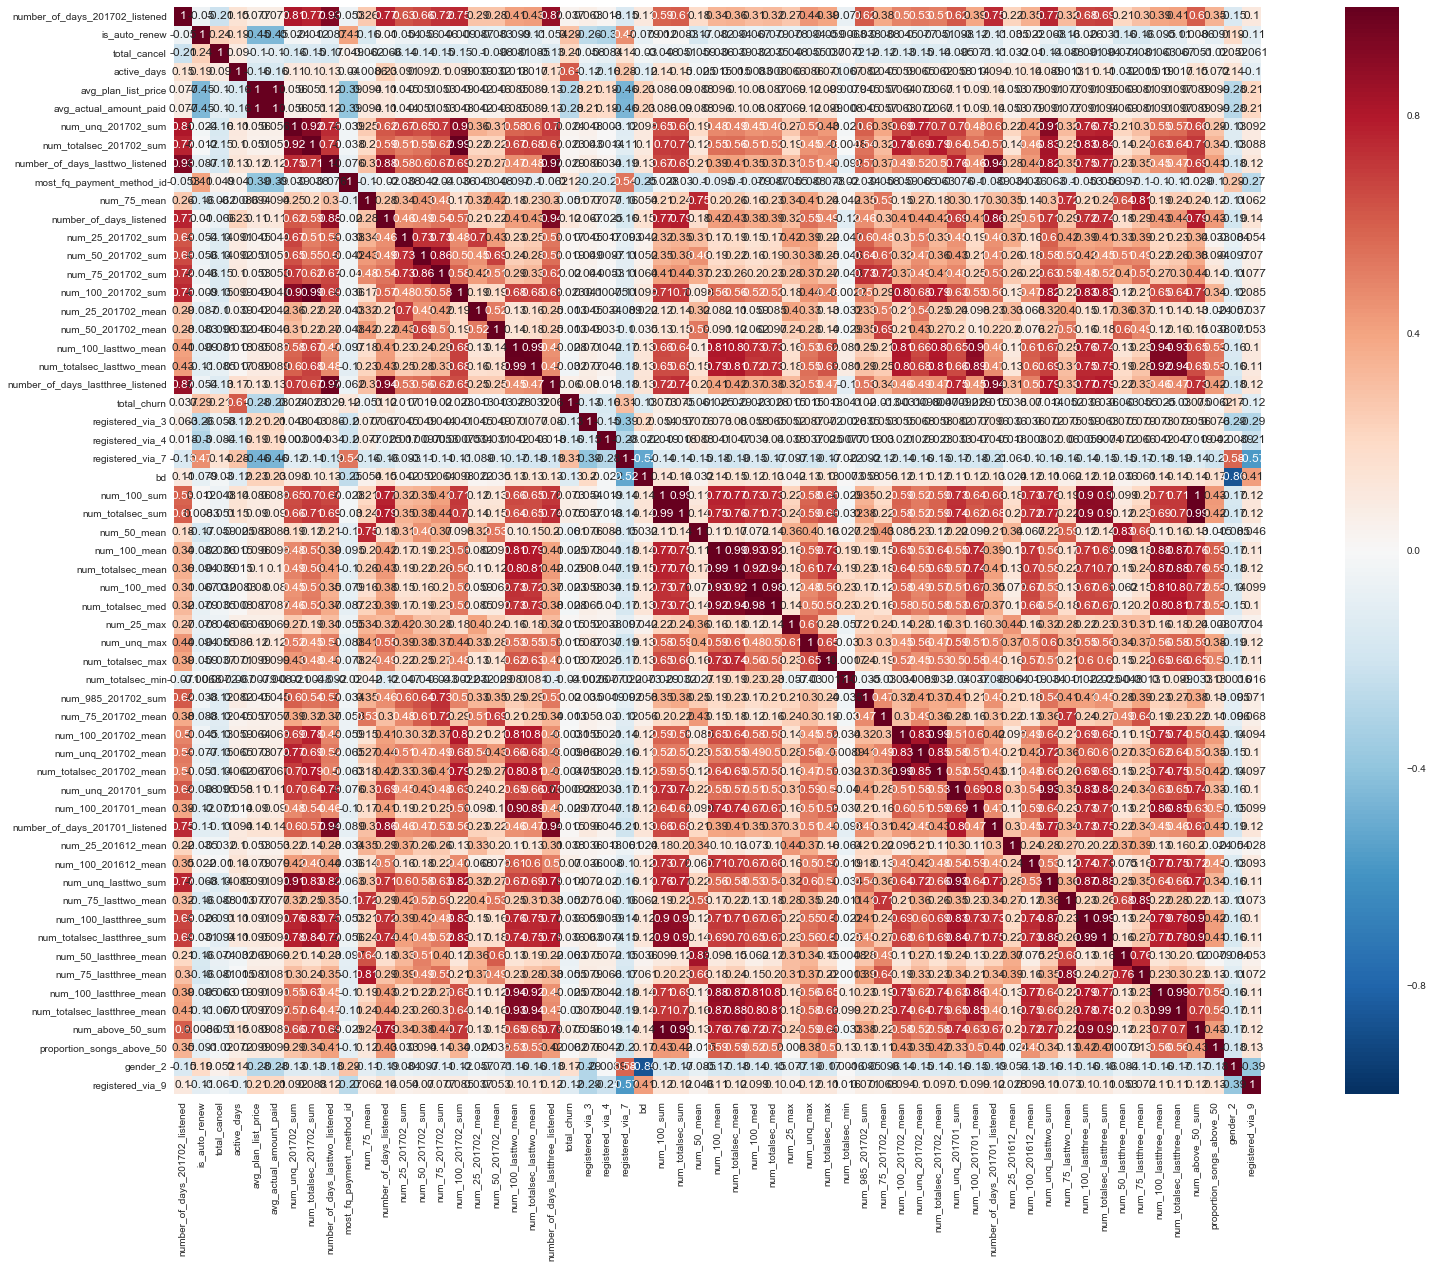

In [35]:
corrmat = for_cor.corr()
f, ax = plt.subplots(figsize=(30, 20))
sbn.heatmap(corrmat, vmax=1, cbar=True, annot=True, square=True);
plt.show()

In [36]:
corrmat.to_csv("corelation_matrix_finalround.csv")

In [41]:
#Correlation Matrix after handling correlation
for_cor_2=df_final_last[['number_of_days_201702_listened','is_auto_renew','total_cancel','active_days','avg_actual_amount_paid','most_fq_payment_method_id','num_75_mean','number_of_days_listened','num_25_201702_sum','num_50_201702_sum','num_100_201702_sum','num_25_201702_mean','num_50_201702_mean','num_totalsec_lasttwo_mean','total_churn','registered_via_3','registered_via_4','registered_via_7','bd','num_totalsec_sum','num_100_med','num_25_max','num_unq_max','num_totalsec_max','num_totalsec_min','num_985_201702_sum','num_75_201702_mean','num_unq_201702_mean','num_unq_201701_sum','num_25_201612_mean','num_100_201612_mean','num_75_lasttwo_mean','num_50_lastthree_mean','proportion_songs_above_50','registered_via_9']]

In [42]:
for_cor_2.shape

(70598, 35)

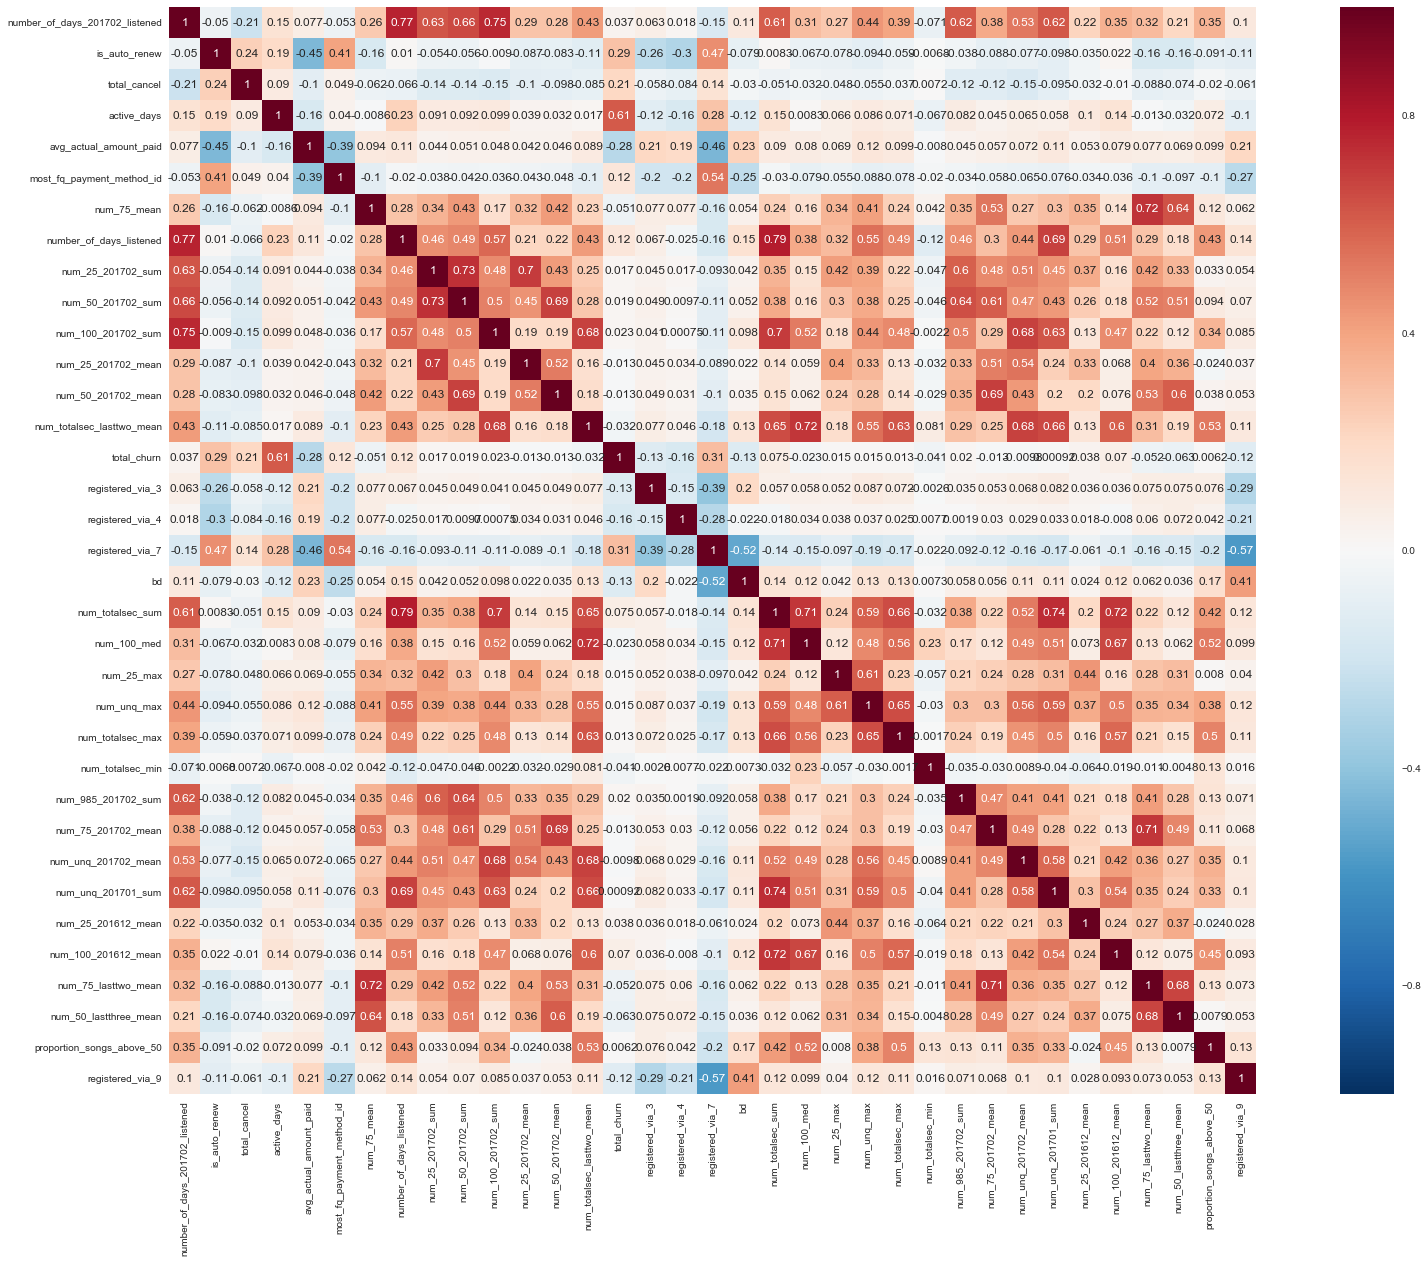

In [43]:
corrmat = for_cor_2.corr()
f, ax = plt.subplots(figsize=(30, 20))
sbn.heatmap(corrmat, vmax=1, cbar=True, annot=True, square=True);
plt.show()